In [1]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

# Read in the raw text (file downloaded from kaggle and renamed https://www.kaggle.com/uciml/sms-spam-collection-dataset)
rawData = open("SMSSpamCollection.csv").read()
parsedData = rawData.replace("ham,", "ham\t")
parsedData = parsedData.replace("spam,", "spam\t")
parsedData = parsedData.replace("\t", "\n").split("\n")
parsedData = parsedData[1:]
labelList = parsedData[0::2]
textList = parsedData[1::2]
data = pd.DataFrame({'label': labelList,
                     'body_text': textList})
data.head()

,label,body_text
0,ham,"""Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there ..."
1,ham,"Ok lar... Joking wif u oni...,,,"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,"U dun say so early hor... U c already then say...,,,"
4,ham,"""Nah I don't think he goes to usf, he lives around here though"",,,"


In [2]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

## Create feature text message length 

In [3]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,body_text,body_len
0,ham,"""Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there ...",97
1,ham,"Ok lar... Joking wif u oni...,,,",27
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,131
3,ham,"U dun say so early hor... U c already then say...,,,",42
4,ham,"""Nah I don't think he goes to usf, he lives around here though"",,,",54


## Create feature for % of text that is punctuation

In [7]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")), 3) * 100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,ham,"""Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there ...",97,14.4
1,ham,"Ok lar... Joking wif u oni...,,,",27,33.3
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,131,6.9
3,ham,"U dun say so early hor... U c already then say...,,,",42,21.4
4,ham,"""Nah I don't think he goes to usf, he lives around here though"",,,",54,13.0


## Evaluate created feature

In [8]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

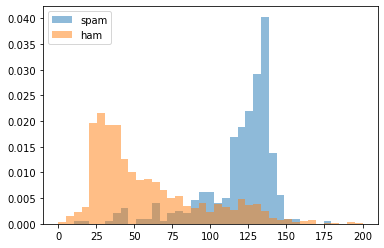

In [13]:
bins = np.linspace(0, 200, 40)
pyplot.hist(data[data['label'] == 'spam']['body_len'], bins, density=True, alpha=0.5,label='spam') # normed argument is changed to density
pyplot.hist(data[data['label'] == 'ham']['body_len'], bins, density=True, alpha=0.5, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

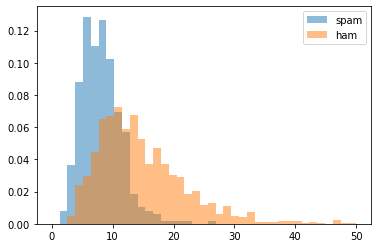

In [14]:
bins = np.linspace(0, 50, 40)
pyplot.hist(data[data['label'] == 'spam']['punct%'], bins, density=True, alpha=0.5,label='spam') # normed argument is changed to density
pyplot.hist(data[data['label'] == 'ham']['punct%'], bins, density=True, alpha=0.5, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

## Transformation

### Create two new features

In [15]:
data.head()

,label,body_text,body_len,punct%
0,ham,"""Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there ...",97,14.4
1,ham,"Ok lar... Joking wif u oni...,,,",27,33.3
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,131,6.9
3,ham,"U dun say so early hor... U c already then say...,,,",42,21.4
4,ham,"""Nah I don't think he goes to usf, he lives around here though"",,,",54,13.0


### Plot the two new features

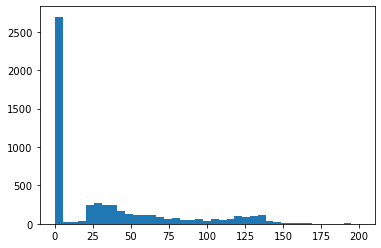

In [16]:
bins = np.linspace(0, 200, 40)
pyplot.hist(data['body_len'], bins)
pyplot.show()

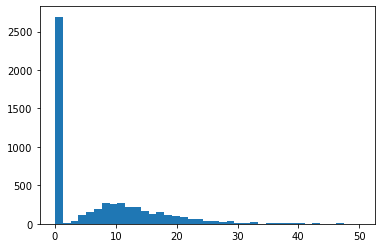

In [18]:
bins = np.linspace(0, 50, 40)
pyplot.hist(data['punct%'], bins)
pyplot.show()

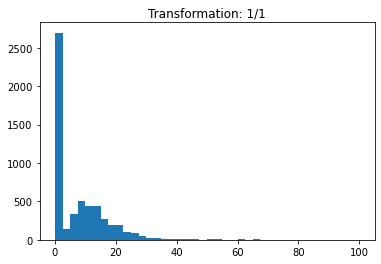

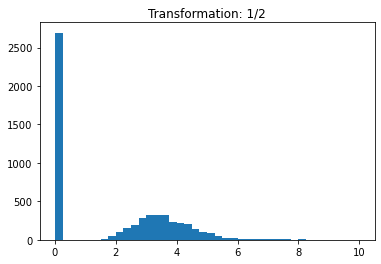

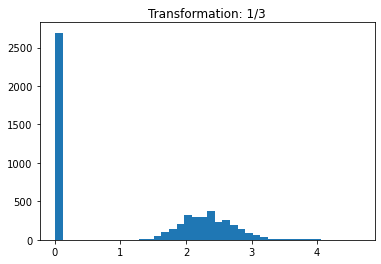

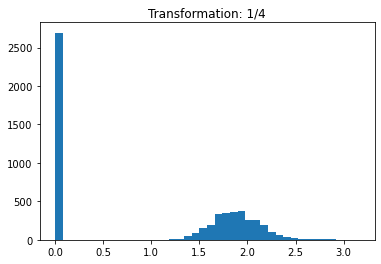

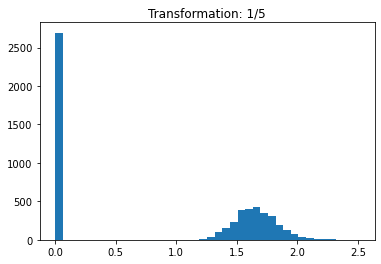

In [19]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['punct%']) ** (1/i), bins=40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()